In [ ]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0

In [23]:
import yfinance as yf
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


In [22]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data  = requests.get(url).text

soup = BeautifulSoup(html_data, 'html.parser')

table = soup.find_all('tbody')[1]

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in table.find_all('tr'):
    col = row.find_all("td")
    if (col != []):
        date = col[0].text.strip()
        revenue = col[1].text.strip()
    
    tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
    
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [21]:
import yfinance as yf
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

game_stop = yf.Ticker("GME")
gme_data = game_stop.history(period="max")

gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666418,1.666418,1.578048,1.607505,7410400,0.0,0.0
4,2002-02-20,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [20]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data  = requests.get(url).text

soup = BeautifulSoup(html_data, 'html.parser')

table = soup.find_all('tbody')[1]

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in table.find_all('tr'):
    col = row.find_all("td")
    if (col != []):
        date = col[0].text
        revenue = col[1].text
    
    gme_revenue = gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]
    
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


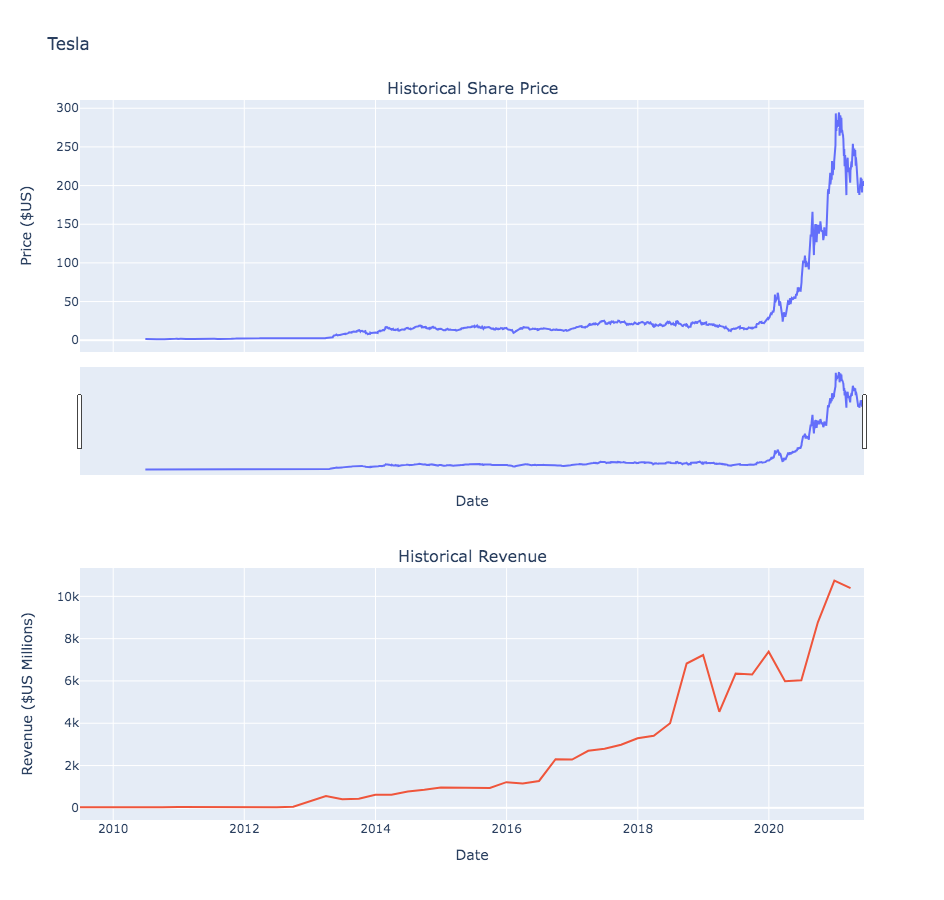

In [19]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

soup = BeautifulSoup(html_data, 'html.parser')

table = soup.find_all('tbody')[1]

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in table.find_all('tr'):
    col = row.find_all("td")
    if (col != []):
        date = col[0].text.strip()
        revenue = col[1].text.strip()
    
    tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)
    
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$', "")
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

def make_graph(tesla_data, tesla_revenue, stock='Tesla'):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing=.3)
    
    tesla_data['Date'] = pd.to_datetime(tesla_data.index)
    tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])
    
    tesla_data_specific = tesla_data[tesla_data['Date'] <= '2021-06-14']
    tesla_revenue_specific = tesla_revenue[tesla_revenue['Date'] <= '2021-04-30']
    
    fig.add_trace(go.Scatter(x=tesla_data_specific['Date'], y=tesla_data_specific['Close'], name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=tesla_revenue_specific['Date'], y=tesla_revenue_specific['Revenue'].astype("float"), name="Revenue"), row=2, col=1)
    
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False, height=900, title=stock, xaxis_rangeslider_visible=True)
    fig.show()

make_graph(tesla_data, tesla_revenue, stock='Tesla')

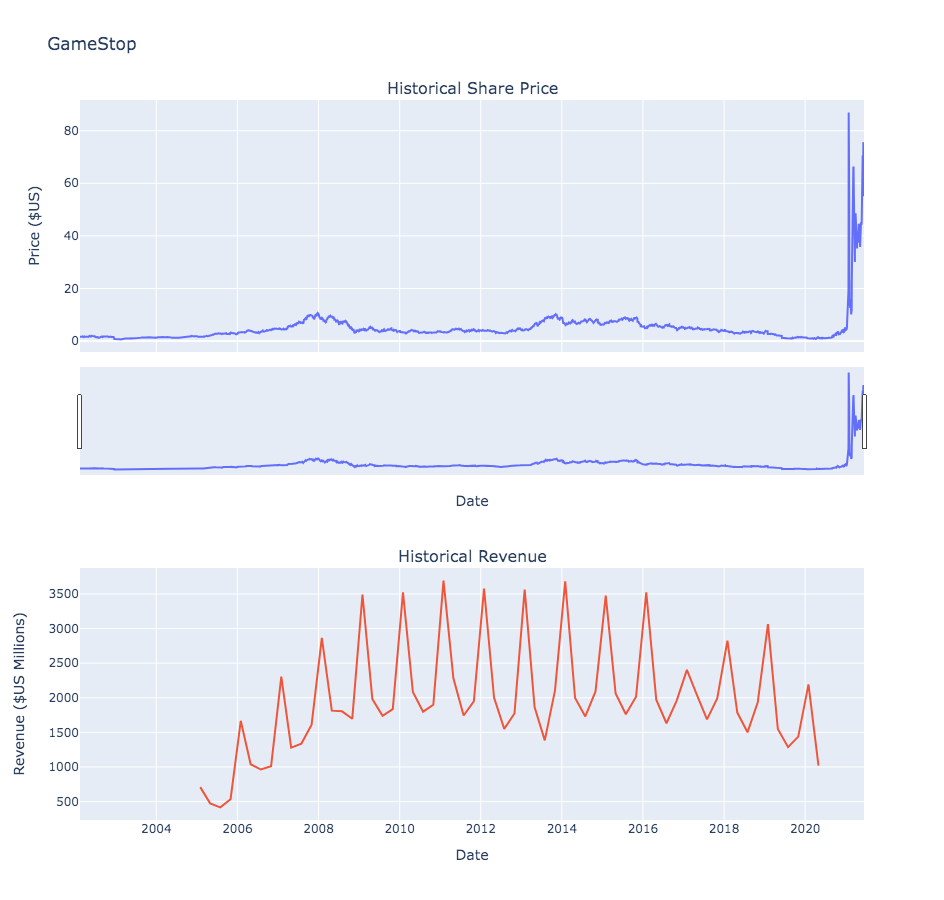

In [18]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text

soup = BeautifulSoup(html_data, 'html.parser')

table = soup.find_all('tbody')[1]

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in table.find_all('tr'):
    col = row.find_all("td")
    if (col != []):
        date = col[0].text.strip()
        revenue = col[1].text.strip()
    
    gme_revenue = gme_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)
    
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

game_stop = yf.Ticker("GME")
gme_data = game_stop.history(period="max")

def make_graph(gme_data, gme_revenue, stock='GameStop'):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing=.3)
    gme_data_specific = gme_data[gme_data.index <= '2021-06-14']
    gme_revenue_specific = gme_revenue[gme_revenue['Date'] <= '2021-04-30']
    fig.add_trace(go.Scatter(x=gme_data_specific.index, y=gme_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=gme_revenue_specific['Date'], y=gme_revenue_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False, height=900, title=stock, xaxis_rangeslider_visible=True)
    fig.show()

make_graph(gme_data, gme_revenue, stock='GameStop')